<a href="https://colab.research.google.com/github/PedroCampos93/Cap-2---Dados-mais-inteligentes---Atividade-1/blob/main/DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

notas = pd.read_csv('ratings.csv')
filmes = pd.read_csv('movies.csv')
tmdb = pd.read_csv('tmdb_5000_movies.csv')

#Analisando Dados

In [2]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
print('Media', notas['nota'].mean())
print('Mediana', notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


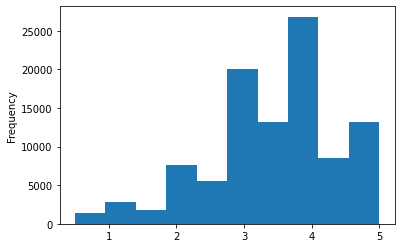

In [8]:
notas['nota'].plot(kind = 'hist')

In [9]:
notas['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


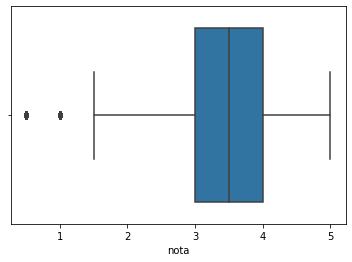

In [10]:
sns.boxplot(notas['nota'])

In [11]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
filmes.columns = ['filmeId', 'titulo', 'generos']

#Analise Filme Individual

In [ ]:
notas.query('filmeId==1').nota.mean()

In [ ]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

In [ ]:
medias_por_filme.plot(kind = 'hist')

In [ ]:
sns.distplot(medias_por_filme, bins=10)

In [ ]:
plt.hist(medias_por_filme)
plt.title('Histograma das Medias dos Filmes')

In [ ]:
tmdb.head()

In [ ]:
tmdb['original_language'].unique()

In [20]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


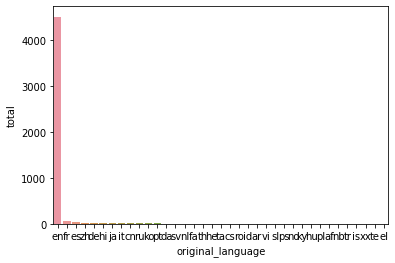

In [21]:
sns.barplot(x='original_language', y='total', data=contagem_de_lingua)

In [22]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


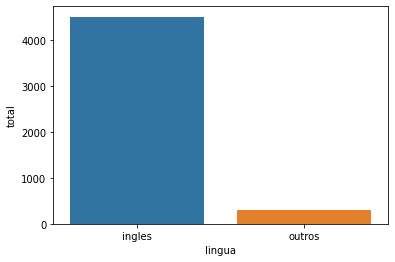

In [28]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x='lingua', y='total', data=dados)

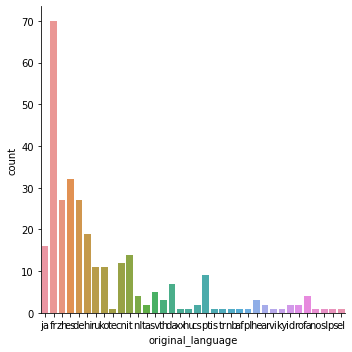

In [43]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en' ")
sns.catplot(x= "original_language", kind='count', data=filmes_sem_lingua_original_em_ingles)